In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

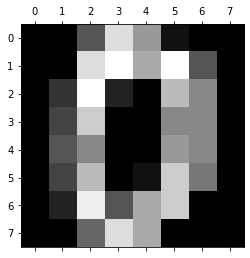

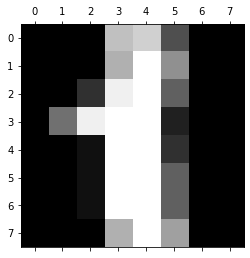

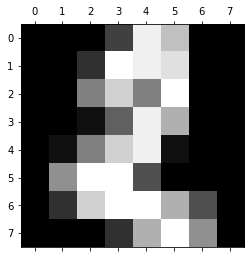

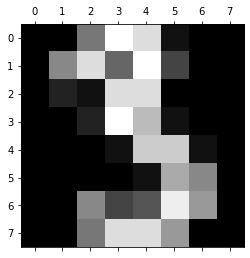

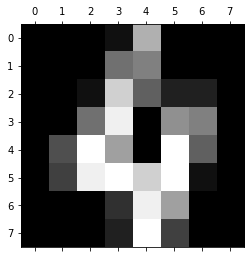

In [10]:
%matplotlib inline
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [11]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [20]:
X = digits.data
y = digits.target
len(X)


1797

In [21]:
len(y)

1797

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [23]:
len(X_train)

1437

In [24]:
len(X_test)

360

In [28]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)
logR.score(X_test, y_test)

C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9694444444444444

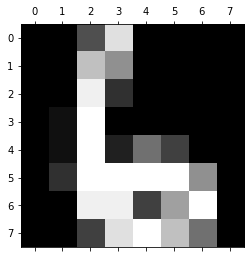

In [29]:
plt.matshow(digits.images[67])

In [30]:
digits.target[67]

6

In [31]:
logR.predict([digits.data[67]])

array([6])

In [33]:
logR.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [34]:
from sklearn.metrics import confusion_matrix

In [36]:
y_predicted = logR.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

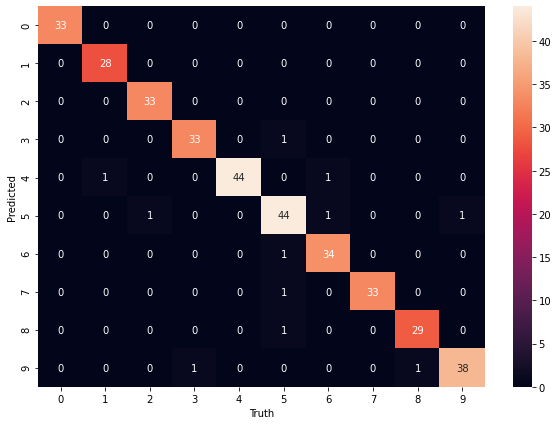

In [40]:

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot= True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
